# 시계열 분석 + XGBRegressor 
- 시계열 특성을 띄는 녀석들은 시계열 분석으로 
- 나머지는 XGB분석으로 
- 변수는 전체 다 사용하기로 

In [1]:
import pandas as pd 
import numpy as np
import itertools
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
train = pd.read_csv('dataset/train.csv')
test =pd.read_csv('dataset/test.csv')

## NaN => 0으로 채우기

In [4]:
train = train.fillna(0)
test = test.fillna(0)

In [5]:
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


## Date column = datetime으로 

In [23]:
train['Date'] = pd.to_datetime(train['Date'],format=('%d/%m/%Y'))
test['Date'] = pd.to_datetime(test['Date'],format=('%d/%m/%Y'))

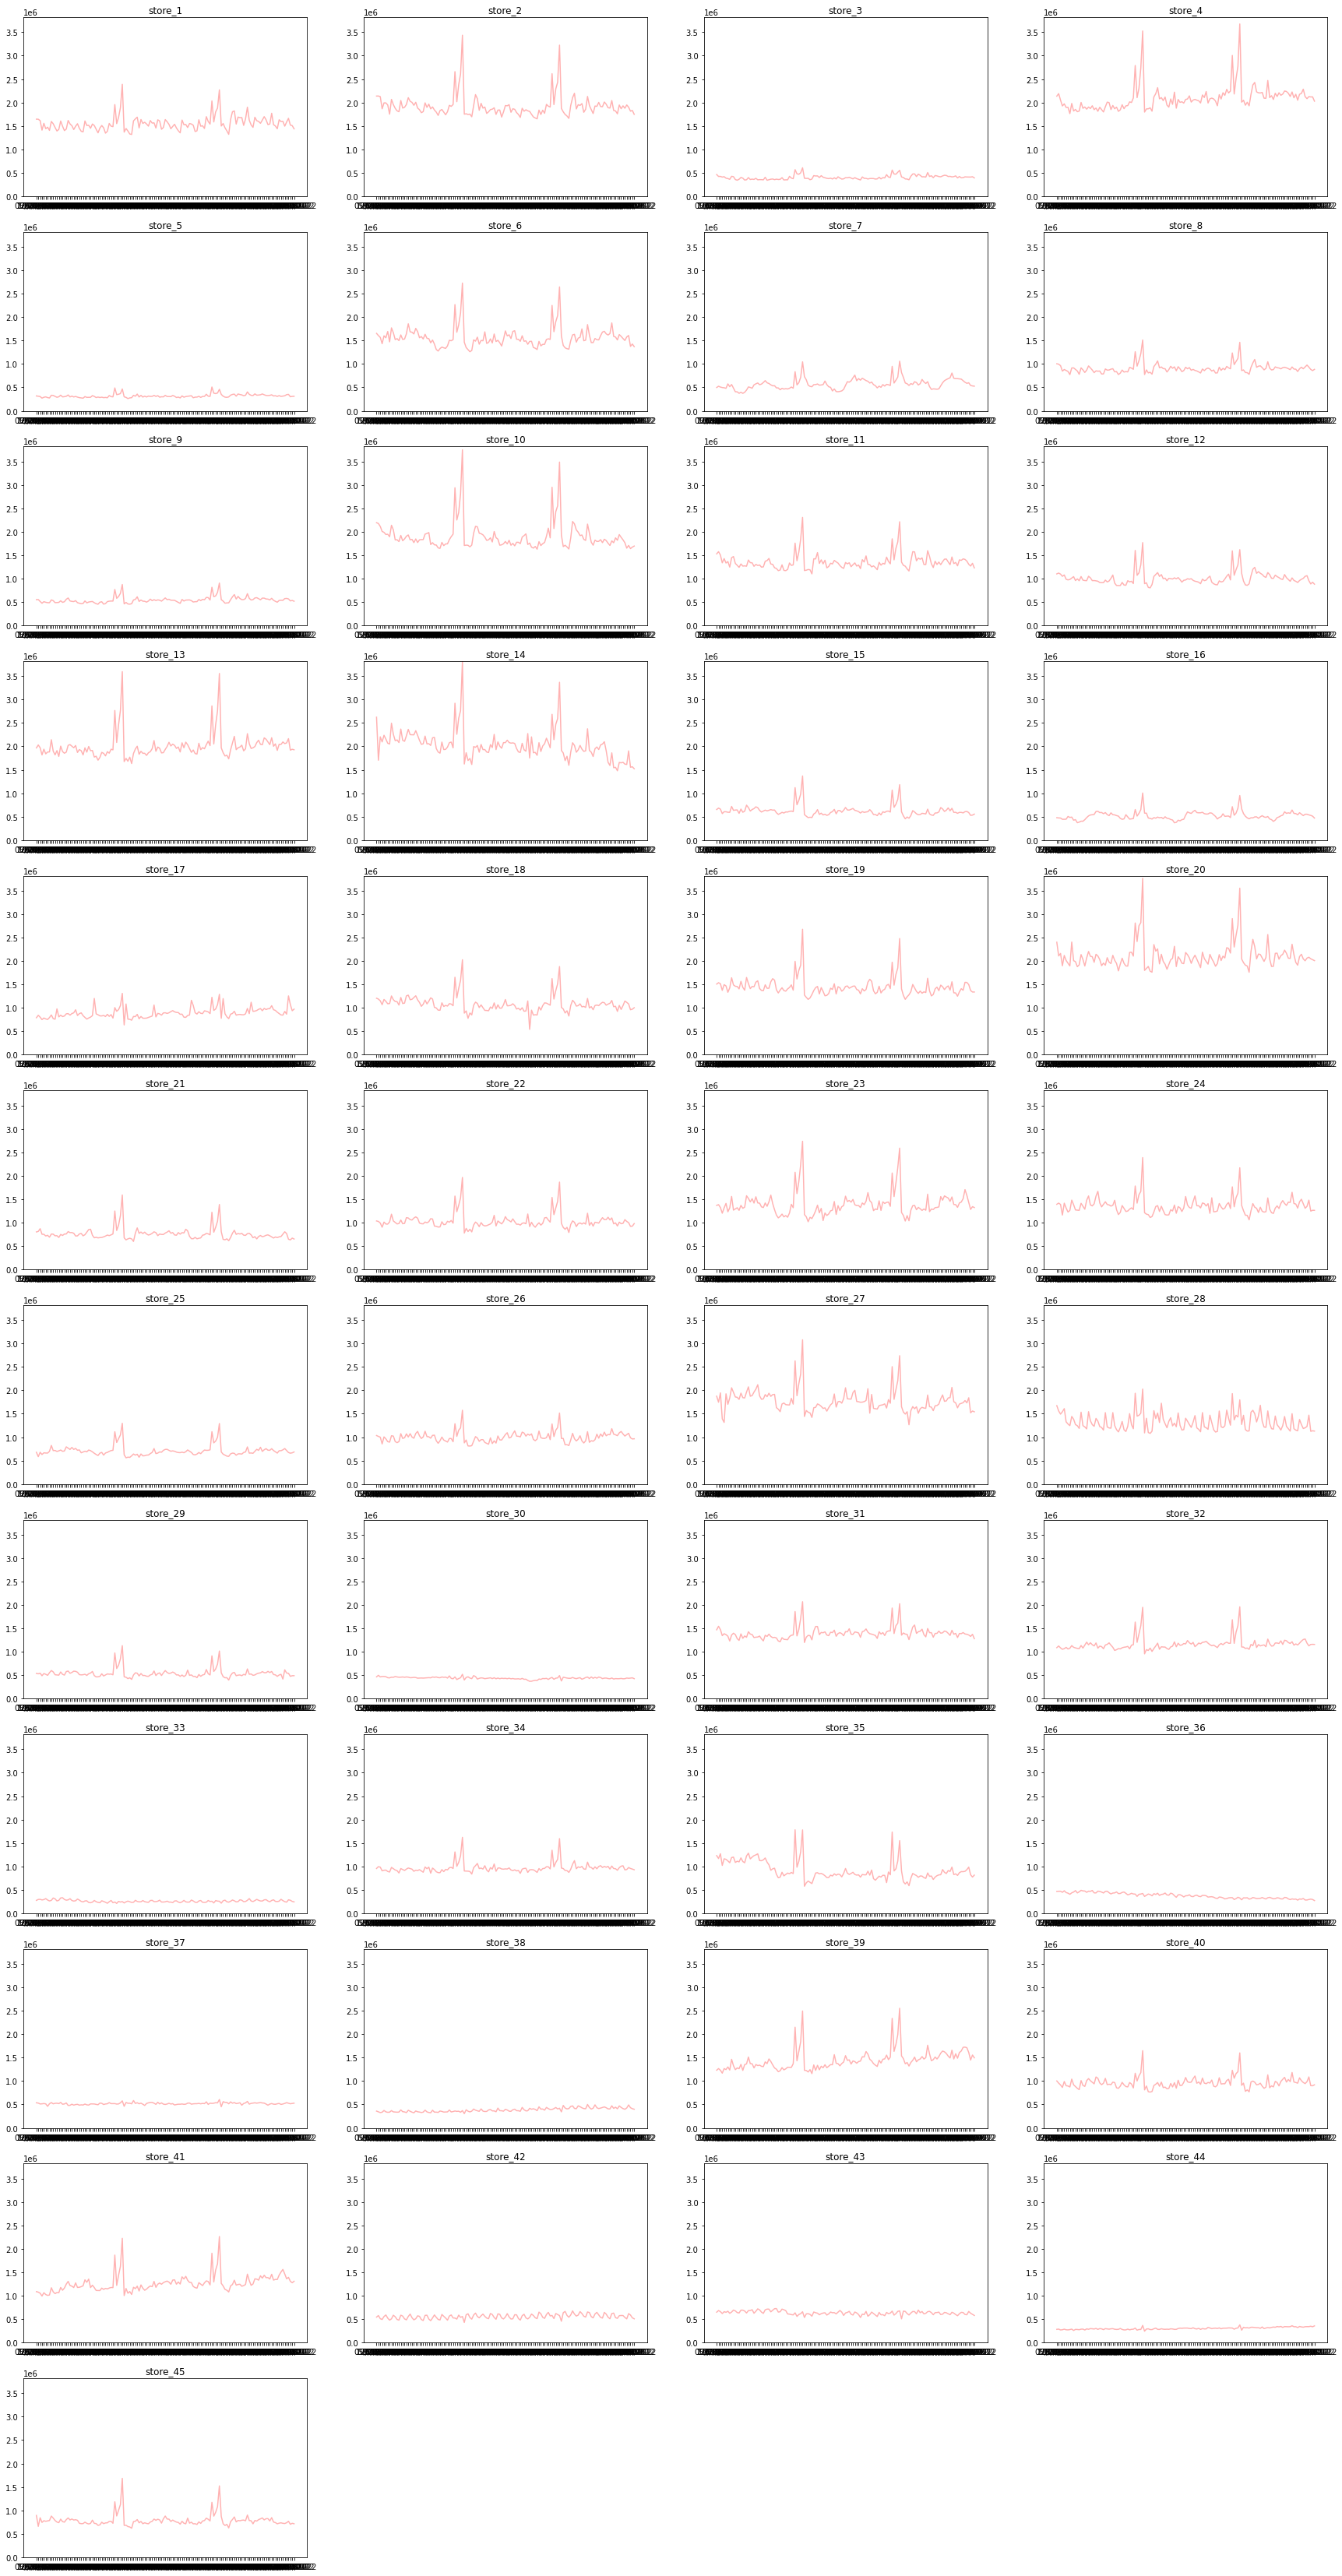

In [6]:
fig = plt.figure(figsize=(30,60))
max_sales = max(train.Weekly_Sales)
for store in range(1,max(train.Store)+1):
    storeset = train[train.Store==store]
    ax = fig.add_subplot(12, 4, store)
    
    plt.title(f"store_{store}")
    ax.plot(storeset.Date,storeset.Weekly_Sales, label="graph", alpha=0.3,color='r')
    plt.ylim(0, max_sales)
    
plt.show()
# 3,5,9,30,33,36,37,38,42,43,44 XGBRegressor 
# 나머지 = 시계열 분석을 해보는것이 어떨까? 


## IsHoliday => True = 0, False=1  라벨인코딩

In [7]:
le = LabelEncoder()
le.fit([True,False])
train['IsHoliday']=le.transform(train['IsHoliday'])
test['IsHoliday']=le.transform(test['IsHoliday'])

In [8]:
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,0,1643690.90
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,1,1641957.44
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,0,1611968.17
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,0,1409727.59
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,0,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,0,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,1,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,0,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,0,723086.20


## 온도, 실업률, 연료 가격은 수치가 다르기 때문에 스케일링을 해주고 시작해야겠다.

In [25]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for Store in range(1,len(train['Store'].unique())+1):
    scale =MinMaxScaler()
    X_train_sc = train[train['Store']==Store][['Temperature','Fuel_Price','Unemployment']]
    X_train_Data = train[train['Store']==Store][['Store','Date','Promotion1','Promotion2','Promotion3','Promotion4','Promotion5','IsHoliday']]
    X_train_Data = X_train_Data.reset_index(level=None,drop=True)
    scale_data = pd.DataFrame(scale.fit_transform(X_train_sc))
    scale_data.columns = ['Temperature','Fuel_Price','Unemployment']
    X_train_Data[['Temperature','Fuel_Price','Unemployment']] = scale_data
    df_train = pd.concat([df_train,X_train_Data],axis=0)

    X_test_sc = test[test['Store']==Store][['Temperature','Fuel_Price','Unemployment']]
    X_test_Data = test[test['Store']==Store][['Store','Date','Promotion1','Promotion2','Promotion3','Promotion4','Promotion5','IsHoliday']]
    X_test_Data = X_test_Data.reset_index(level=None,drop=True)
    scale_test = pd.DataFrame(scale.transform(X_test_sc))
    scale_test.columns =['Temperature','Fuel_Price','Unemployment'] 
    X_test_Data[['Temperature','Fuel_Price','Unemployment']] = scale_test
    df_test = pd.concat([df_test,X_test_Data])

In [26]:
df_train = df_train.reset_index(level=None,drop=True)
df_test = df_test.reset_index(level=None,drop=True)

In [28]:
df_test

,Store,Date,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,IsHoliday,Temperature,Fuel_Price,Unemployment
0,1,2012-10-05,8077.89,0.00,18.22,3617.43,3626.14,0,0.589333,0.791816,-0.279633
1,1,2012-10-12,2086.18,0.00,8.11,602.36,5926.45,0,0.490489,0.780330,-0.279633
2,1,2012-10-19,950.33,0.00,4.93,80.25,2312.85,0,0.579022,0.775305,-0.279633
3,1,2012-10-26,2585.85,31.75,6.00,1057.16,1305.01,0,0.600178,0.712132,-0.279633
4,2,2012-10-05,6037.76,0.00,10.04,3027.37,3853.40,0,0.617540,0.791816,-0.224559
...,...,...,...,...,...,...,...,...,...,...,...
175,44,2012-10-26,38.65,2.61,0.98,0.00,457.74,0,0.449955,0.924433,-0.070059
176,45,2012-10-05,5046.74,0.00,18.82,2253.43,2340.01,0,0.692908,0.940746,0.427817
177,45,2012-10-12,1956.28,0.00,7.89,599.32,3990.54,0,0.516118,0.951719,0.427817
178,45,2012-10-19,2004.02,0.00,3.18,437.73,1537.49,0,0.550051,0.929042,0.427817


In [29]:
df_train['Weekly_Sales'] = train['Weekly_Sales']

 3,5,9,30,33,36,37,38,42,43,44 번은 XGBoost 나머지는 ARIMA 모델 

In [13]:
XGB_list = [3,5,9,30,33,36,37,38,42,43,44]

In [30]:
df_train1 = df_train.copy()

In [31]:
df_train1.index = df_train1.Date

In [32]:
df_train1= df_train1[['Store','Weekly_Sales']]

In [35]:
df_train1[df_train1.index <'2012-09']

,Store,Weekly_Sales
Date,,
2010-02-05,1,1643690.90
2010-02-12,1,1641957.44
2010-02-19,1,1611968.17
2010-02-26,1,1409727.59
2010-03-05,1,1554806.68
...,...,...
2012-08-03,45,725729.51
2012-08-10,45,733037.32
2012-08-17,45,722496.93


In [41]:
df_train_split = pd.DataFrame()
df_val_split = pd.DataFrame()
for Store in range(1,len(df_train['Store'].unique())+1):
    df_train2 = df_train1[df_train1['Store']==Store]
    df_train_X = df_train2[df_train2.index <'2012-09']
    df_val_X = df_train2[df_train2.index >'2012-09']
    df_train_split = pd.concat([df_train_split,df_train_X],axis=0)
    df_val_split = pd.concat([df_val_split,df_val_X],axis=0)

In [66]:
result4 = [] 

for Store in range(1,len(df_train['Store'].unique())+1):
    df_arima = df_train_split[df_train_split['Store']==Store].drop('Store',axis=1)
    df_arima = np.log(df_arima)
    kpss_diffs= ndiffs(df_arima,alpha=0.05,test='kpss',max_d=6)
    adf_diffs = ndiffs(df_arima,alpha=0.05,test='adf',max_d=6)
    n_diffs=max(adf_diffs,kpss_diffs)
    model = pm.auto_arima(y=df_arima,
                d=n_diffs,
                start_p = 0,
                max_p=3,
                start_q=0,
                max_q=3,
                m= 1,
                seasonal=True,
                trace=False)
    model.fit(df_arima)
    pred = np.exp(model.predict(n_periods=4))
    result4.append(pred)    

In [67]:
result4 = list(itertools.chain(*np.around(result4,2)))

In [54]:
result3 =list(itertools.chain(*np.around(result3,2)))

In [70]:
df_val_split[df_val_split['Store']==2]

,Store,Weekly_Sales
Date,,
2012-09-07,2,1898777.07
2012-09-14,2,1814806.63
2012-09-21,2,1829415.67
2012-09-28,2,1746470.56


In [45]:
from pmdarima.arima import ndiffs
import pmdarima as pm

In [64]:
df_arima = df_train1[df_train1['Store']==1].drop('Store',axis=1)
df_arima

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68
...,...
2012-08-31,1582083.40
2012-09-07,1661767.33
2012-09-14,1517428.87


In [76]:
kpss_diffs= ndiffs(df_arima,alpha=0.05,test='kpss',max_d=6)
adf_diffs = ndiffs(df_arima,alpha=0.05,test='adf',max_d=6)
n_diffs=max(adf_diffs,kpss_diffs)
print('차수', n_diffs)

차수 1


In [124]:
model = pm.auto_arima(y=df_arima,
                     d=n_diffs,
                     start_p = 0,
                     max_p=3,
                     start_q=0,
                     max_q=3,
                     m= 1,
                     trace=False)

In [125]:
model.fit(df_arima)

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 0, 2, 52),
      suppress_warnings=True)

In [85]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  139
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1853.191
Date:                Tue, 02 Aug 2022   AIC                           3712.382
Time:                        13:37:32   BIC                           3721.163
Sample:                             0   HQIC                          3715.950
                                - 139                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4003      0.059      6.774      0.000       0.284       0.516
ma.L1         -0.9364      0.033    -28.413      0.000      -1.001      -0.872
sigma2      2.499e+10   5.13e-14   4.87e+23      0.000     2.5e+10     2.5e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):                94.67
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.85
Prob(H) (two-sided):                  0.62   Kurtosis:                         6.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.54e+41. Standard errors may be unstable.
"""

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


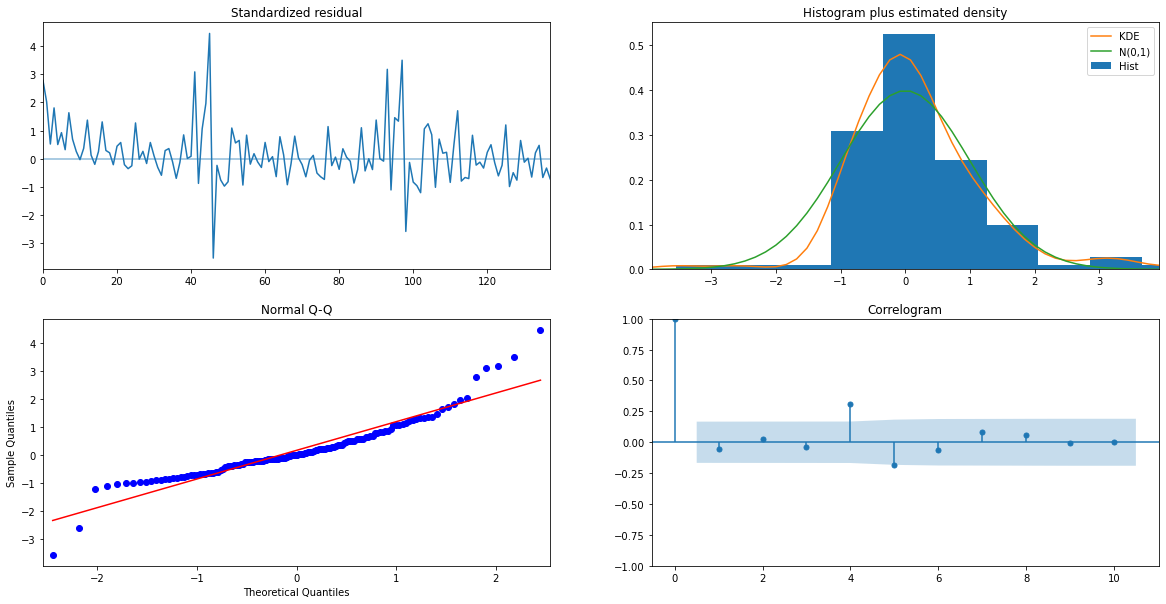

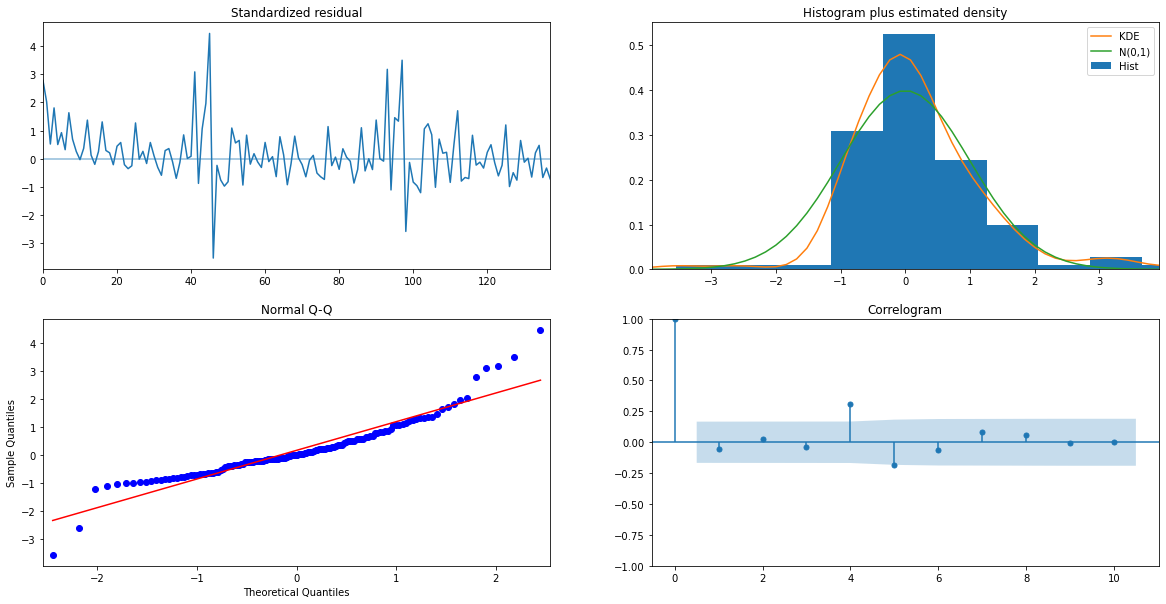

In [86]:
model.plot_diagnostics(figsize=(20,10))

In [103]:
df_test1 = pd.DataFrame()

In [104]:
df_test1.index = df_test['Date'].unique()

In [107]:
model.predict(n_periods=len(df_test1))

array([1516408.43205064, 1548171.65572642, 1560886.37413122,
       1565976.03586592])

In [110]:
        model = XGBRegressor()
        train_X = df_train[df_train['Store']==Store].iloc[:,2:-1]
        train_y = df_train[df_train['Store']==Store].iloc[:,-1]
        model.fit(train_X,train_y)
        test_X = df_test[df_test['Store']==Store].iloc[:,2:]
        pred= model.predict(test_X)
        pred

array([719416.6 , 698240.25, 747298.94, 784396.94], dtype=float32)

train set 만들어서 로그 - autoarima  - val 검증용 

In [72]:
result5 = []
for Store in range(1,len(df_train['Store'].unique())+1):
    if Store in XGB_list:
        model = XGBRegressor()
        train_X = df_train[df_train['Store']==Store].iloc[:,2:-1]
        train_y = df_train[df_train['Store']==Store].iloc[:,-1]
        model.fit(train_X,train_y)
        test_X = df_test[df_test['Store']==Store].iloc[:,2:]
        pred= model.predict(test_X)
        result5.append(pred)
    else:
        df_arima = df_train_split[df_train_split['Store']==Store].drop('Store',axis=1)
        df_arima = np.log(df_arima)
        kpss_diffs= ndiffs(df_arima,alpha=0.05,test='kpss',max_d=6)
        adf_diffs = ndiffs(df_arima,alpha=0.05,test='adf',max_d=6)
        n_diffs=max(adf_diffs,kpss_diffs)
        model = pm.auto_arima(y=df_arima,
                    d=n_diffs,
                    start_p = 0,
                    max_p=3,
                    start_q=0,
                    max_q=3,
                    m= 1,
                    seasonal=True,
                    trace=False)
        model.fit(df_arima)
        pred = np.exp(model.predict(n_periods=4))
        result5.append(pred)    